# A/B тест интернет-магазина

## Приоритизация гипотез

Вместе с отделом маркетинга мы подготовили список гипотез для увелечение выручки  
Наша задача: приоритизировать гипотезы, чтобы было понимания, с каких гипотез начинать исследования

* Для начала загрузим библиотеки, которые потребуются для исследования
* Далее просмотрим датафрейм
* Сделаем предобработку данных
* Применим фреймворк ``ICE`` для приоритизации гипотез
* Применим фреймворк ``RICE``
* Сделаем выводы на основе полученных данных

In [1]:
#Загрузим библиотеки, которые нам нужны для дальнейшего исследования
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt 
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 210

In [2]:
#Откроем датафрейм с гипотезами
hypothesis = pd.read_csv('/Users/alekseivlasov/Desktop/project/7/hypothesis.csv')

hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
#Приведем название столбцов к правильному стилю
hypothesis.columns = [x.lower() for x in hypothesis.columns.values]

In [4]:
#Просмотрим общую инфомацию
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Датафрейм загризили, привели к правильному стилю и проверили общую информацию. Все готово для исследования

### Применим фреймворк ``ICE`` для приоритизации гипотез и отсортируем их по убыванию приоритета

In [5]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Применив фреймворк ``ICE`` мы определили наиболее перспективные гипотезы: 8, 0, 7

### Применим фреймворк ``RICE`` для приоритизации гипотез и отсортируем их по убыванию приоритета

In [6]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']

display(hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Применив фреймворк ``RICE`` мы определили наиболее перспективные гипотезы, список немного отличается от ``ICE``: 7, 2, 0, 6  
Гипотезы 0 и 6 набрали одинаковые значения

In [7]:
#Просмотрим всею таблицу с результатами и отсортируем по RICE
hypothesis.sort_values(by='rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


### Вывод

* На первое место перешла 7 гипотеза, которая была на 3 месте, когда применили ``ICE``
* 8 гипотеза ушла с наиболее перспективных гипотез
* На втором месте теперь 2 гипотеза, вместо 0, а 0 гипотеза поделила третье место с 6 гипотезой

Это произошло, потому что в модификации ``RICE`` появился еще один компонтент ``Reach``, который теперь еще учитывает, скольких пользователей затронет изменение, которое мы хотим внести

## Анализ A/B-теста

Теперь приступаем к анализу A/B-теста
**Наша задача:** провести анализ и принять решение по результатам теста 
**Варианты решений:**
1. Остановить тест, зафиксировать победу одной из групп;
2. Остановить тест, зафиксировать отсутствие различий между группами;
3. Продолжить тест.

**Какие шаги будут проделаны в ходе анализа:**

* Предобработка данных
* Построение графиков по ключевым метрикам
* Определение аномальных значений и устранение их
* Подсчет статистической значимости по ключевым метрикам
* Вывод по тесту

### Предобработка данных

In [8]:
#Откроем таблицы
orders = pd.read_csv('/Users/alekseivlasov/Desktop/project/7/orders.csv')
visitors = pd.read_csv('/Users/alekseivlasov/Desktop/project/7/visitors.csv')

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [9]:
#Посмотрим общую информацию по датафреймам
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В таблице ``orders`` нужно привести название столбцов к правильному стилю и изменитиь тип данных в столбце ``date``  
В таблице ``visitors`` тоже поменяем тип данных в столбце ``date``  
Пропусков в таблицах нет

In [11]:
#Переименуем столбцы
orders = orders.rename(
    columns={'transactionId':'transaction_id', 'visitorId':'visitor_id'}
)

In [12]:
#Поменяем тип данных
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [13]:
#Проверим изменения
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Перед исследованием проверим, нет ли пользователей, которые попали в обе группы

In [15]:
id_duplicated = (
    orders.groupby('visitor_id')
    .agg({'group':'nunique'})
    .sort_values(by='group', ascending=False)
    .reset_index()
)

id_duplicated.head()

,visitor_id,group
0,2654030115,2
1,3891541246,2
2,3941795274,2
3,1404934699,2
4,351125977,2


In [16]:
#Оставим в переменной только те id, которые попали в 2 группы
id_duplicated = id_duplicated.query('group == 2')
id_duplicated['visitor_id'].count()

58

Мы получили 58 пользователей, которые, за время эксперимента, были в двух группах  
Такие id лучше удалить, чтобы тест был корректный

In [17]:
#Оставим только список id
id_duplicated = list(id_duplicated['visitor_id'])

In [18]:
#Уберем строки, где есть пользователи из списка
orders = orders.query('visitor_id != @id_duplicated')

Чтобы построить графики для анализа A/B-теста, нужно собрать кумулятивные данные

In [19]:
#Cоздаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date', 'group']].drop_duplicates()

#получаем агрегированные кумулятивные по дням данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'transaction_id':'nunique', 'visitor_id':'nunique', 'revenue':'sum'})
    ,axis=1
).sort_values(by=['date', 'group'])

#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'})
    ,axis=1
).sort_values(by=['date', 'group'])

#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_df = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_df.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulative_df.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


**Мы сделали предобработку данных:**

* Привели название столбцов к правильному стилю
* Изменили тип данных в нужных столбцах 
* Нашли и удалили пользователей, кто попал в 2 группы
* Создали датафрейм с кумулятивными данными

Теперь можно приступить к исследованию

### Построим график кумулятивной выручки по группам

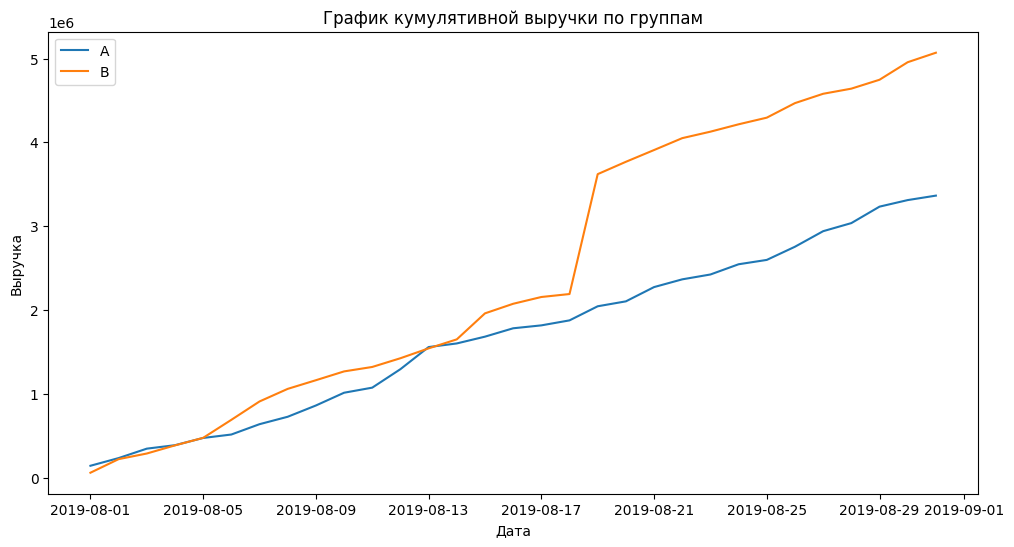

In [20]:
#Разделим датафреймы по группам 
cumulative_revenue_a = cumulative_df[cumulative_df['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_revenue_b = cumulative_df[cumulative_df['group'] == 'B'][['date', 'revenue', 'orders']]

#Строим графики
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label = 'B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend();

На графике мы видим, что первые 5 дней 2 группы шли примерно с одинаковой выручкой. Далее группа ``B`` начала показывать больше выручки, но 13 августа группа ``А`` догнала.  
С 17 августа был резкий скачок у группы ``B`` и дальше группа ``B`` лидировала  
Этот скачок нужно будет отдельно посмотреть, что там могло произойти

### Построим график кумулятивного среднего чека по группам

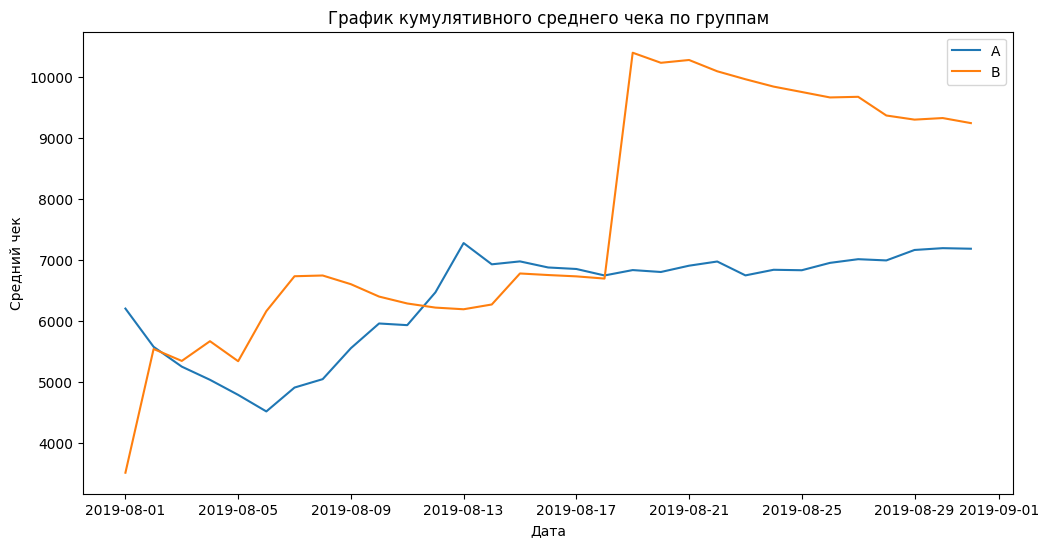

In [21]:
plt.figure(figsize=(12,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label = 'A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label = 'B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

В самом начале теста у группы ``А`` был средний чек больше, дальше у группы ``B`` резко средний чек вырос, возможно попались круппные чеки   
К середине теста у группы ``А`` стабилизировался средний чек и шел ровно, а вот группа ``B`` показала еще один резкий скачок вверх

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

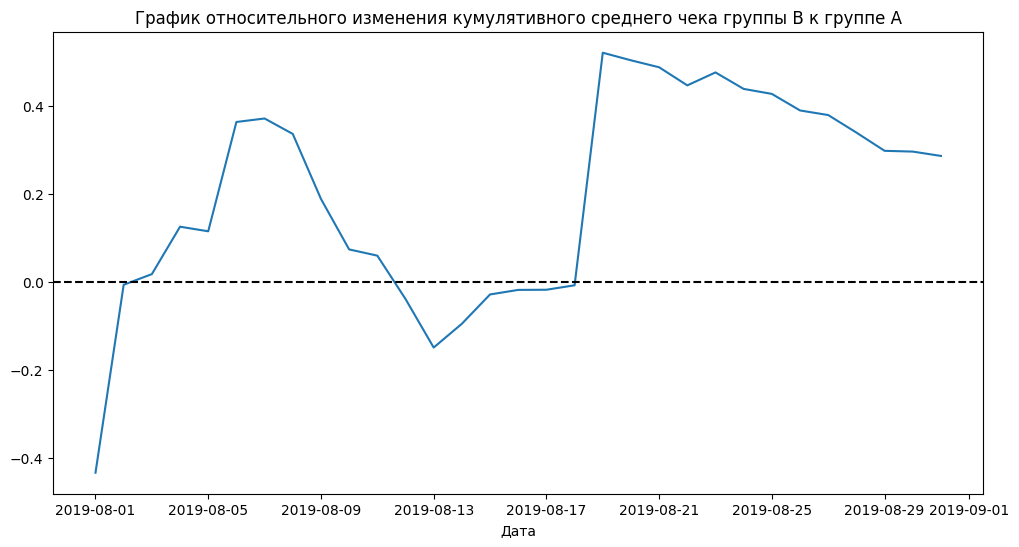

In [22]:
#Собираем данные в одном датафрейме
merge_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes =['a', 'b']
)

#строим отношение средних чеков
plt.figure(figsize=(12,6))
plt.plot(merge_cumulative_revenue['date'], 
         (merge_cumulative_revenue['revenueb']/merge_cumulative_revenue['ordersb'])/
        (merge_cumulative_revenue['revenuea']/merge_cumulative_revenue['ordersa']) - 1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

#добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы  
Найдём их позже

### Построим график кумулятивной конверсии по группам

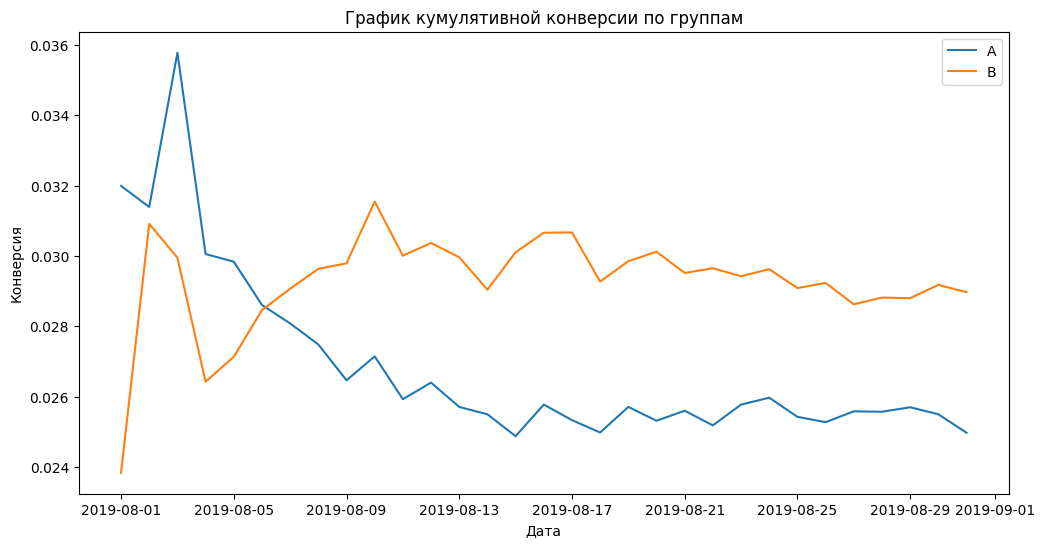

In [23]:
#Считаем кумулятивную конверсию 
cumulative_df['conversion'] = cumulative_df['orders'] / cumulative_df['visitors']

#отделяем данные по группе A
cumulative_df_a = cumulative_df[cumulative_df['group'] == 'A']

#отделяем данные по группе B
cumulative_df_b = cumulative_df[cumulative_df['group'] == 'B']

#строим график
plt.figure(figsize=(12,6))
plt.plot(cumulative_df_a['date'], cumulative_df_a['conversion'], label = 'A')
plt.plot(cumulative_df_b['date'], cumulative_df_b['conversion'], label = 'B')
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.legend();

Вначале группа ``A`` лидидровала по конверсии, но далее группа ``B`` вышла вперед и дальше график шел ровно

### Построим график относительного изменения кумулятивной конверсии группы B к группе A

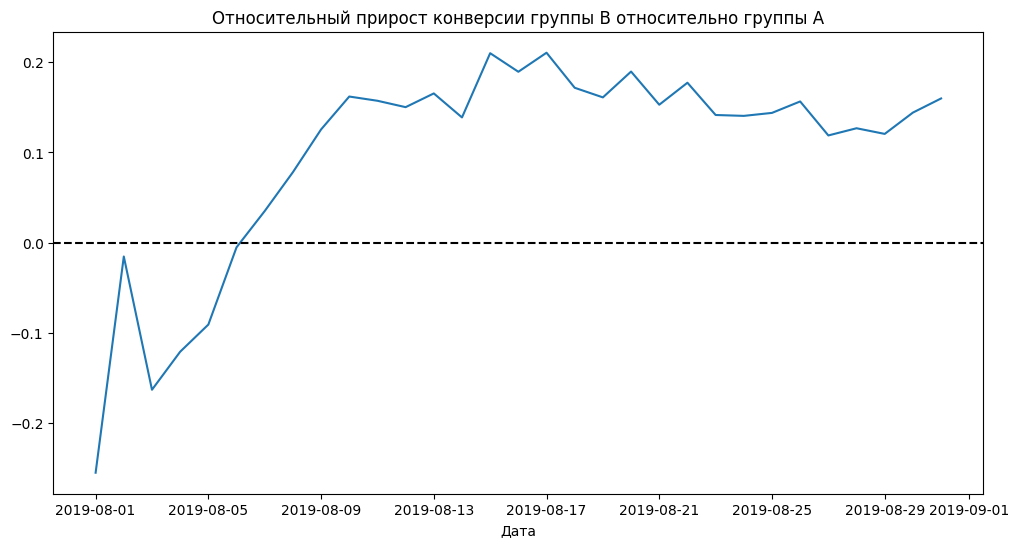

In [24]:
#Собираем данные в одном датафрейме
merge_cumulative_conversion = cumulative_df_a[['date', 'conversion']].merge(
    cumulative_df_b[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left',
    suffixes = ['a', 'b']
)

#строим отношение конверсии
plt.figure(figsize =(12,6))
plt.plot(merge_cumulative_conversion['date'], merge_cumulative_conversion['conversionb']/
        merge_cumulative_conversion['conversiona'] - 1
)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xlabel('Дата')


plt.axhline(y=0, color= 'black', linestyle ='--');

В начале теста группа ``B`` значительно проигрывала группе ``A``, затем вырвалась вперёд.  
В целом, делать какие-либо выводы по тесту нельзя. Сперва стоит проанализировать аномалии, возможно, они изменят картину

### Построим точечный график количества заказов по пользователям

In [25]:
#Подготовим датафрейм
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id':'nunique'})
)

orders_by_users.columns = ['user_id', 'orders']

orders_by_users.head()

,user_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1


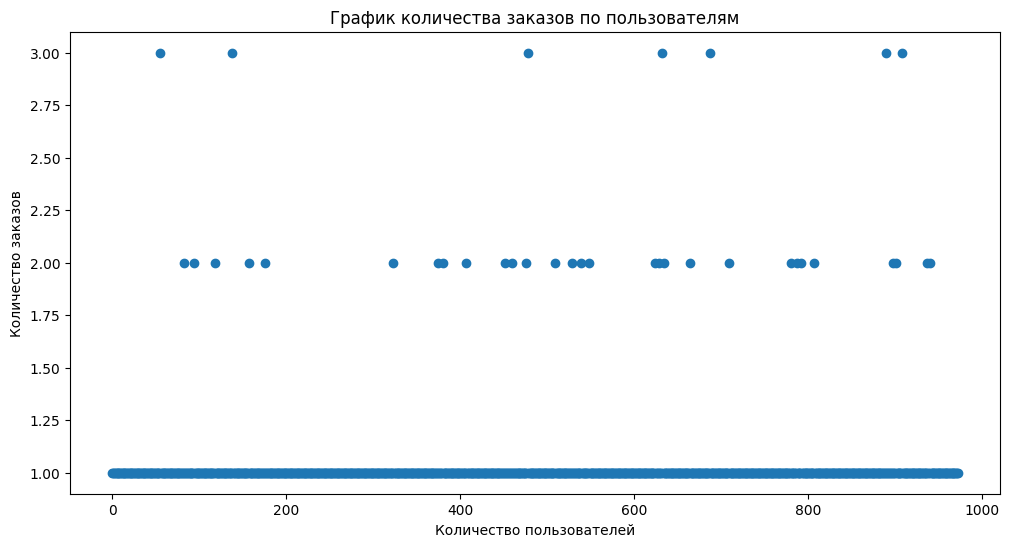

In [26]:
#Построим график
x_values = pd.Series(range(0, len(orders_by_users)))

plt.figure(figsize=(12,6))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов');

Максимальное количество заказов на одного пользователя 3  
Большая часть пользователей делает 1 заказ

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
percentile_orders = np.percentile(orders_by_users['orders'], [95, 99])
percentile_orders

array([1., 2.])

Не более 1% пользователей оформляли больше чем 1 заказ  
Оставим пользователей, которые делали 1 заказ

### Построим точечный график стоимостей заказов

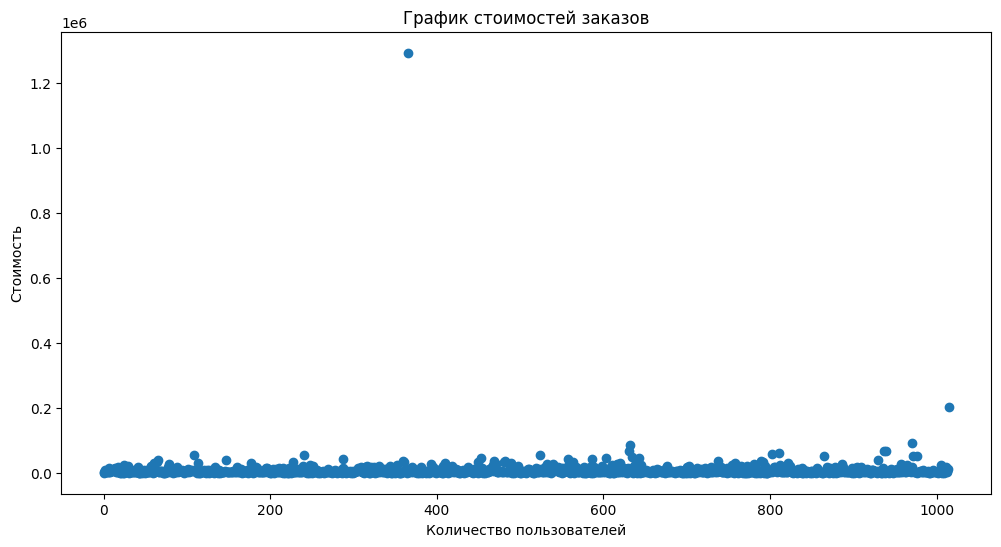

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(12, 6))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость');

У нас 2 явных аномальных по заказа, которые сильно отличаются от большинства  
Остальные идут очень ровно

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [29]:
percentile_revenue = np.percentile(orders['revenue'], [95, 99])
percentile_revenue

array([26785., 53904.])

Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей  
Оставим заказы, стоимостью менее 26 785 рублей

**Подготовим данные для следующего исследования**

In [30]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_a':'sum'}), axis=1,
)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']


visitors_b_daily = visitors[visitors['group'] =='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']]
    .agg({'date':'max', 'visitors_per_date_b':'sum'}), axis=1,
)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

orders_a_daily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
)
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
    lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_a':'sum', 'revenue_per_date_a':'sum'}), axis=1,
).sort_values(by=['date'])
orders_a_cummulative.columns = ['date', 'orders_cumulative_a', 'revenue_cummulative_a']

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id':pd.Series.nunique, 'revenue':'sum'})
)
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
    lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']]
    .agg({'date':'max', 'orders_per_date_b':'sum', 'revenue_per_date_b':'sum'}), axis=1,
).sort_values(by=['date'])
orders_b_cummulative.columns = ['date', 'orders_cummulative_b', 'revenue_cummulative_b']

df_final = (
    orders_a_daily.merge(
        orders_b_daily, left_on='date', right_on='date', how='left'
    )
.merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
.merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
.merge(visitors_a_daily, left_on='date', right_on='date', how='left')
.merge(visitors_b_daily, left_on='date', right_on='date', how='left')
.merge(visitors_a_cummulative, left_on='date', right_on='date', how='left')
.merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
)

display(df_final.head())

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,orders_cumulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Подготовили датафрейм для дальнейшего исследования

### Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Создадим переменные ``orders_by_users_a`` и ``orders_by_users_b`` со столбцами ``['user_id', 'orders']``. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов

In [31]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id':pd.Series.nunique})
)
orders_by_users_b.columns = ['user_id', 'orders']

Объявим переменные ``sample_a`` и ``sample_b``, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [32]:
sample_a = pd.concat(
    [orders_by_users_a['orders']
    ,pd.Series(
        0, index=np.arange(df_final['visitors_per_date_a'].sum() - 
                          len(orders_by_users_a['orders'])), name='orders'
    )
    ], axis=0
)

sample_b = pd.concat(
    [
        orders_by_users_b['orders']
        , pd.Series(
            0, index=np.arange(df_final['visitors_per_date_b'].sum() -
                              len(orders_by_users_b['orders'])), name='orders'
        )
    ], axis=0
)

Выведем относительный прирост среднего числа заказов группы ``B``: среднее число заказов группы ``B`` / среднее число заказов группы ``A`` - 1. Округлим до трёх знаков после запятой.

In [33]:
print("Статистическая значимость: {0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

Статистическая значимость: 0.011
Относительный прирост среднего числа заказов группы B: 0.160


**Вывод**

* По "сырым" данным различия в конверсии между группами ``A`` и ``B`` есть, так как p-value меньше 0.05
* Группа ``B`` на 16% превышает группу ``A``

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [34]:
print("Статистическая значимость: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue']
                                          , orders[orders['group'] == 'B']['revenue'])[1]))
print("Относительный прирост среднего числа заказов группы B: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() 
                       / orders[orders['group'] == 'A']['revenue'].mean() -1))

Статистическая значимость: 0.829
Относительный прирост среднего числа заказов группы B: 0.287


**Вывод**

* P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

* Средний чек группы ``B``выше среднего чека группы ``A`` на 28%

### Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил более 1 заказа или совершил заказ дороже 26 785 рублей. Таким образом мы уберем 5% пользователей с наибольшим числом заказов пользователей с дорогими заказами

In [35]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > percentile_orders[0]]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > percentile_orders[0]]['user_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > percentile_revenue[0]]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

display(abnormal_users.head())
display(abnormal_users.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
dtype: int64

86

Мы обнаружили всего 86 аномальных пользователей

In [36]:
#Подготовим выборки количества заказов по пользователям по группам теста

sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_final['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders'
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df_final['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders'
        ),
    ],
    axis=0,
)

In [37]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print("{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

0.016
0.174


Результаты по конверсии почти не изменились  
Посмотрим, произошло что-нибудь с результатами по среднему чеку

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [38]:
print(
    "{0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A', 
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormal_users)),
            )
        ]['revenue'].mean() -1
    )
)

0.727
-0.034


P-value уменьшился и группа ``B`` теперь ниже на 3%

## Вывод

Мы завершили анализ по A/B-тесту, теперь можно перейти к выводу и дальшейшему решению

**Построив график кумулятивной выручки по групам мы выяснили:**  
Первые 5 дней 2 группы шли примерно с одинаковой выручкой. Далее группа ``B`` начала показывать больше выручки, но 13 августа группа ``А`` догнала. С 17 августа был резкий скачок у группы ``B`` и дальше группа ``B`` лидировала  


**Следующим графиком построили кумулятивный средий чек по группам:**  
В самом начале теста у группы ``А`` был средний чек больше, дальше у группы ``B`` резко средний чек вырос, возможно попались круппные чеки    
К середине теста у группы ``А`` стабилизировался средний чек и шел ровно, а вот группа ``B`` показала еще один резкий скачок вверх  

**Построили график относительного изменения кумулятивного среднего чека группы B к группе A:**  
В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы  

**Построили график кумулятивной конверсии по группам:**  
Вначале группа ``A`` лидидровала по конверсии, но далее группа ``B`` вышла вперед и дальше график шел ровно  

**Построили график относительного изменения кумулятивной конверсии группы B к группе A:**  
В начале теста группа ``B`` значительно проигрывала группе ``A``, затем вырвалась вперёд   

**Построили точечный график количества заказов по пользователям:**  
Выяснили, что максимальное количество заказов на одного пользователя - 3, а большая часть пользователей делает - 1 заказ  

**Посчитали 95-й и 99-й перцентили количества заказов на пользователя:**  
* Не более 1% пользователей оформляли больше чем 1 заказ  
* Приняли решение оставить пользователей, которые делали 1 заказ  

**Построили точечный график стоимостей заказов:**  
У нас получилось 2 явных аномальных по заказа, которые сильно отличаются от большинства    

**Посчитали 95-й и 99-й перцентили стоимости заказов:**  
* Не более 5% заказов дороже 26 785 рублей и не более 1% дороже 53 904 рублей  
* Оставили заказы, стоимостью менее 26 785 рублей  

**Посчитали статистическую значимость различий в конверсии между группами по «сырым» данным**  
Сформулировали гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.  
* По "сырым" данным различия в конверсии между группами ``A`` и ``B`` есть, так как p-value меньше 0.05
* Группа ``B`` на 16% превышает группу ``A``  

**Посчитали статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным**  
Сформулировали гипотезы. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.  
* P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет

* Средний чек группы ``B``выше среднего чека группы ``A`` на 28%  

**Посчитали статистическую значимость различий в конверсии между группами по «очищенным» данным**  
Результаты по конверсии почти не изменились  

**Посчитали статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**  
P-value уменьшился и группа ``B`` теперь ниже на 3%

**Решение по A/B- тесту:**

* Есть статистически значимое различие по конверсии между группами по «сырым» и по данным после фильтрации аномалий

* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий

* График различия конверсии между группами сообщает, что результаты группы B лучше группы A


A/B-тест можно завершать и зафиксировать победу группе ``B``, так как рост конверсии статистически не опровергли